In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train_data = pd.read_csv("ML_Train_Data.csv")

In [3]:
df_train_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Classification
0,0,1.998401e-18,0.000059,0.000066,0.000079,0.000075,0.000072,0.000059,0.000055,0.000042,...,0.000030,0.000057,0.000045,0.000025,0.000031,0.000053,0.000047,0.000033,0.000148,1
1,1,6.439294e-18,0.000047,0.000121,0.000035,0.000072,0.000091,0.000012,0.000046,0.000111,...,0.000086,0.000068,0.000091,0.000006,0.000099,0.000045,0.000034,0.000124,0.000040,1
2,2,8.437695e-18,0.000110,0.000049,0.000150,0.000069,0.000084,0.000087,0.000116,0.000141,...,0.000122,0.000091,0.000135,0.000093,0.000058,0.000051,0.000052,0.000079,0.000065,1
3,3,3.108624e-18,0.000124,0.000140,0.000061,0.000178,0.000145,0.000066,0.000086,0.000086,...,0.000022,0.000085,0.000083,0.000063,0.000081,0.000155,0.000132,0.000103,0.000001,1
4,4,1.132427e-17,0.000034,0.000047,0.000068,0.000106,0.000103,0.000071,0.000041,0.000063,...,0.000108,0.000044,0.000072,0.000077,0.000036,0.000037,0.000035,0.000116,0.000046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,492,2.886580e-18,0.000585,0.000538,0.000706,0.001131,0.000664,0.000167,0.000587,0.000506,...,0.001006,0.000357,0.000960,0.000960,0.000697,0.000626,0.000750,0.001112,0.000130,3
380,493,1.432188e-17,0.000895,0.000269,0.000881,0.000140,0.000944,0.000132,0.000914,0.001414,...,0.002000,0.001668,0.001187,0.001028,0.000331,0.000199,0.000134,0.000752,0.001982,3
381,494,8.881784e-18,0.001689,0.000365,0.000716,0.000627,0.000062,0.000638,0.000905,0.000484,...,0.001402,0.000345,0.002073,0.001431,0.001631,0.001110,0.002290,0.000148,0.000172,3
382,495,4.529710e-17,0.002816,0.001422,0.000980,0.000898,0.002116,0.000437,0.000877,0.000936,...,0.004013,0.002082,0.005844,0.004043,0.005057,0.003420,0.003110,0.003129,0.002629,3


In [4]:
split_factor = 0.9
classes = ['Stillstand', 'Waschen', 'Schleudern']
X = df_train_data.iloc[:, 1:52].values
y = df_train_data.iloc[:, 52].values
print(X)
print(y)

[[1.99840144e-18 5.88482529e-05 6.55243979e-05 ... 4.67136757e-05
  3.27361285e-05 1.47680000e-04]
 [6.43929354e-18 4.73219034e-05 1.20969384e-04 ... 3.40211072e-05
  1.24485344e-04 3.96000000e-05]
 [8.43769499e-18 1.10432027e-04 4.88822360e-05 ... 5.22140715e-05
  7.87806067e-05 6.51700000e-05]
 ...
 [8.88178420e-18 1.68907397e-03 3.65416882e-04 ... 2.29046509e-03
  1.47953007e-04 1.72420000e-04]
 [4.52970994e-17 2.81554185e-03 1.42187677e-03 ... 3.11017564e-03
  3.12893975e-03 2.62921000e-03]
 [1.59872116e-17 1.36879744e-03 1.00310515e-03 ... 2.79381249e-03
  3.16233220e-03 8.47655000e-03]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [5]:
n_samples = len(X)
data = X.reshape((n_samples, -1))
data

array([[1.99840144e-18, 5.88482529e-05, 6.55243979e-05, ...,
        4.67136757e-05, 3.27361285e-05, 1.47680000e-04],
       [6.43929354e-18, 4.73219034e-05, 1.20969384e-04, ...,
        3.40211072e-05, 1.24485344e-04, 3.96000000e-05],
       [8.43769499e-18, 1.10432027e-04, 4.88822360e-05, ...,
        5.22140715e-05, 7.87806067e-05, 6.51700000e-05],
       ...,
       [8.88178420e-18, 1.68907397e-03, 3.65416882e-04, ...,
        2.29046509e-03, 1.47953007e-04, 1.72420000e-04],
       [4.52970994e-17, 2.81554185e-03, 1.42187677e-03, ...,
        3.11017564e-03, 3.12893975e-03, 2.62921000e-03],
       [1.59872116e-17, 1.36879744e-03, 1.00310515e-03, ...,
        2.79381249e-03, 3.16233220e-03, 8.47655000e-03]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_factor, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
classifier = MLPClassifier(alpha=0.2, max_iter=5000, verbose=True, early_stopping=False)

In [8]:
classifier.fit(X_train_std,y_train)

Iteration 1, loss = 1.53426259
Iteration 2, loss = 1.38294783
Iteration 3, loss = 1.25090689
Iteration 4, loss = 1.14060936
Iteration 5, loss = 1.05290550
Iteration 6, loss = 0.98903715
Iteration 7, loss = 0.94580032
Iteration 8, loss = 0.91709140
Iteration 9, loss = 0.89825553
Iteration 10, loss = 0.88574711
Iteration 11, loss = 0.87748856
Iteration 12, loss = 0.87190686
Iteration 13, loss = 0.86786572
Iteration 14, loss = 0.86478232
Iteration 15, loss = 0.86217692
Iteration 16, loss = 0.85975669
Iteration 17, loss = 0.85750886
Iteration 18, loss = 0.85530653
Iteration 19, loss = 0.85325878
Iteration 20, loss = 0.85110896
Iteration 21, loss = 0.84874353
Iteration 22, loss = 0.84634050
Iteration 23, loss = 0.84385495
Iteration 24, loss = 0.84155708
Iteration 25, loss = 0.83936238
Iteration 26, loss = 0.83732597
Iteration 27, loss = 0.83558460
Iteration 28, loss = 0.83373149
Iteration 29, loss = 0.83189036
Iteration 30, loss = 0.83004714
Iteration 31, loss = 0.82820637
Iteration 32, los

MLPClassifier(alpha=0.2, max_iter=5000, verbose=True)

In [9]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test_std)
probabilities = classifier.predict_proba(X_test_std)

Classification report for classifier MLPClassifier(alpha=0.2, max_iter=5000, verbose=True):
              precision    recall  f1-score   support

           1       0.51      0.46      0.49       115
           2       0.54      0.70      0.61       116
           3       1.00      0.80      0.89       115

    accuracy                           0.65       346
   macro avg       0.68      0.65      0.66       346
weighted avg       0.68      0.65      0.66       346




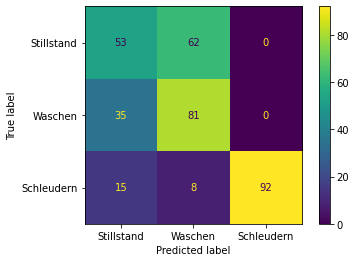

In [10]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
cm = confusion_matrix(y_test, predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()

In [11]:
def calcFFT(accel,nrsamples):
    accel_without_mean = accel - np.mean(accel)  # Subtract mean Value to reduce the DC Offset in the FFT
    freq = np.fft.rfft(accel_without_mean, nrsamples, norm='ortho')
    freq = np.abs(freq)
    freq = freq / nrsamples  # Normalize the Amplitude by the known sample number
    return freq

In [12]:
def prepare_classification_data(df, StartSample, LengthSample):
    EndSample = StartSample+LengthSample

    a_x = df.iloc[StartSample:EndSample,0].values
    a_y = df.iloc[StartSample:EndSample,1].values
    a_z = df.iloc[StartSample:EndSample,2].values

    a_abs = np.sqrt(a_x*a_x+a_y*a_y+a_z*a_z)

    fs = 100.0 # Sample Frequency 200 Hz
    SampleNr = LengthSample
    Period = 1/fs

    x_time=np.linspace(0.0,Period*SampleNr,SampleNr)
    x_freq=np.linspace(0.0,fs/2.0,int(SampleNr/2)+1)

    aabs_freq=calcFFT(a_abs,SampleNr)
    return aabs_freq, x_time, x_freq

In [13]:
def gen_test_data(df):
    StartSample = 0
    LengthSample = len(df.index)
    EndSample = StartSample+LengthSample

    a_x = df.iloc[StartSample:EndSample,0].values
    a_y = df.iloc[StartSample:EndSample,1].values
    a_z = df.iloc[StartSample:EndSample,2].values

    a_abs = np.sqrt(a_x*a_x+a_y*a_y+a_z*a_z)

    fs = 100.0 # Sample Frequency 200 Hz
    SampleNr = LengthSample
    Period = 1/fs

    x_time=np.linspace(0.0,Period*SampleNr,SampleNr)
    x_freq=np.linspace(0.0,fs/2.0,int(SampleNr/2)+1)

    aabs_freq=calcFFT(a_abs,SampleNr)
    return aabs_freq, x_time, x_freq

In [14]:
test_data_frame1 = pd.read_csv('Test.csv')

In [15]:
df_test_data1 = test_data_frame1[:102]
df_test_data2 = test_data_frame1[1000:1102]
print(df_test_data1)
print(df_test_data2)

          Ax       Ay       Az
0    0.03857  0.03491  1.02441
1    0.03345  0.03394  1.03809
2    0.03955  0.03296  1.02490
3    0.03662  0.03223  1.02905
4    0.03613  0.03345  1.03711
..       ...      ...      ...
97   0.03540  0.02832  1.03662
98   0.04077  0.03223  1.02808
99   0.03638  0.02466  1.03027
100  0.03491  0.03027  1.02832
101  0.03833  0.02539  1.03540

[102 rows x 3 columns]
           Ax       Ay       Az
1000  0.03442  0.02954  1.02954
1001  0.04053  0.02661  1.03687
1002  0.03442  0.02734  1.03076
1003  0.03735  0.03027  1.02588
1004  0.03076  0.03394  1.03394
...       ...      ...      ...
1097  0.04688  0.03613  1.02686
1098  0.04272  0.03320  1.02930
1099  0.04199  0.03101  1.04565
1100  0.03931  0.03076  1.03638
1101  0.03857  0.03394  1.03833

[102 rows x 3 columns]


(<AxesSubplot:>, <AxesSubplot:>)

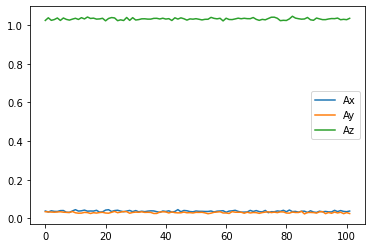

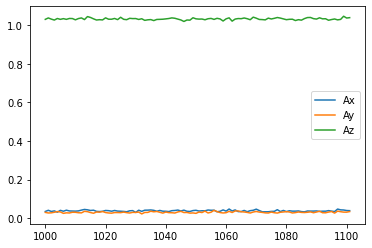

In [16]:
df_test_data1.plot(), df_test_data2.plot()

In [17]:
test_data1,x_time,x_freq = gen_test_data(df_test_data1)
test_data2,x_time,x_freq = gen_test_data(df_test_data2)

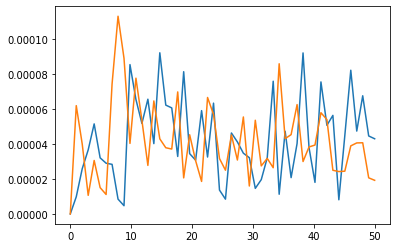

In [18]:
plt.plot(x_freq,test_data1)
plt.plot(x_freq,test_data2) # plot FFT for x-accel

In [19]:
test_data1,x_time,x_freq = gen_test_data(df_test_data1)
test_data2,x_time,x_freq = gen_test_data(df_test_data2)

In [20]:
test_1 = np.delete(test_data1,0)
test_2 = np.delete(test_data2,0)
test = np.vstack((test_1,test_2))
test

array([[9.79350137e-06, 2.58468041e-05, 3.66194406e-05, 5.14770781e-05,
        3.20598774e-05, 2.89938736e-05, 2.83446168e-05, 8.45580552e-06,
        4.69065882e-06, 8.53751149e-05, 6.54232342e-05, 5.17510437e-05,
        6.55901340e-05, 4.01968819e-05, 9.21357195e-05, 6.22182531e-05,
        6.06202469e-05, 3.28558323e-05, 8.13157987e-05, 3.44637301e-05,
        3.07427043e-05, 5.90625881e-05, 3.25326043e-05, 6.33367349e-05,
        1.36277235e-05, 8.44138447e-06, 4.62699308e-05, 4.11696671e-05,
        3.47242870e-05, 3.21621434e-05, 1.46116235e-05, 1.96115113e-05,
        3.20666979e-05, 7.58725825e-05, 1.12500106e-05, 4.72579423e-05,
        2.07505239e-05, 4.02323228e-05, 9.20541346e-05, 3.79644273e-05,
        1.80421972e-05, 7.54772149e-05, 5.06695749e-05, 5.63425437e-05,
        8.08772092e-06, 4.47972080e-05, 8.21563989e-05, 4.73688578e-05,
        6.75538592e-05, 4.45748192e-05, 4.29717663e-05],
       [6.19163563e-05, 3.99453770e-05, 1.06255949e-05, 3.05572450e-05,
       

In [21]:
test_std = sc.transform(test)

In [22]:
predicted = classifier.predict(test_std)
probabilities = classifier.predict_proba(test_std)

In [23]:
for i in range(2):
    print(predicted[i])
    print(probabilities[i])

2
[0. 1. 0.]
2
[0. 1. 0.]


In [24]:
def machine_learning_training():
    print("Der Algorithmus für das maschinelle Lernen wird trainiert...\n")
    df_train_data = pd.read_csv("ML_Train_Data.csv")

    split_factor = 0.9
    X = df_train_data.iloc[:, 1:52].values
    y = df_train_data.iloc[:, 52].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_factor, random_state=1, stratify=y)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    classifier = MLPClassifier(solver="adam", alpha=0.2, max_iter=5000, early_stopping=False)
    classifier.fit(X_train_std, y_train)
    predicted = classifier.predict(X_test_std)
    print("Classification report for classifier %s:\n%s\n"
          % (classifier, metrics.classification_report(y_test, predicted)))
    print("Das Training des maschinellen Lernens ist abgeschlossen\n")
    return sc, classifier

In [25]:
def machine_learning_classification(sc, classifier, df_new_data):
    freq_data_1, x_time, x_freq = gen_test_data(df_new_data[len(df_new_data)-102:])
    freq_data_2, x_time, x_freq = gen_test_data(df_new_data[len(df_new_data)-100102:len(df_new_data)-100000])
    classification_set_1 = np.delete(freq_data_1, 0)
    classification_set_2 = np.delete(freq_data_2, 0)
    classification_set = np.vstack((classification_set_1, classification_set_2))
    classification_data = sc.transform(classification_set)
    predicted = classifier.predict(classification_data)
    probability = classifier.predict_proba(classification_data)
    print(predicted)
    print(probability)
    if predicted[0] == predicted[1]:
        predicted_state = predicted[0]
    elif probability[predicted[0]-1] > probability[predicted[1]-1]:
        predicted_state = predicted[0]
        print("Keine eindeutige Bestimmung des aktuellen Status möglich.\nDie Wahrscheinlichkeit der vorhergesagten Klasse beträgt: "+ str(probability[predicted[0]-1]*100)+"%")
    elif probability[predicted[0]-1] < probability[predicted[1]-1]:
        predicted_state = predicted[1]
        print("Keine eindeutige Bestimmung des aktuellen Status möglich.\nDie Wahrscheinlichkeit der vorhergesagten Klasse beträgt: " + str(probability[predicted[1] - 1] * 100) + "%")
    print(predicted_state)

In [26]:
sc, classifier = machine_learning_training()
machine_learning_classification(sc, classifier, test_data_frame1)

Der Algorithmus für das maschinelle Lernen wird trainiert...

Classification report for classifier MLPClassifier(alpha=0.2, max_iter=5000):
              precision    recall  f1-score   support

           1       0.50      0.44      0.47       115
           2       0.52      0.68      0.59       116
           3       1.00      0.80      0.89       115

    accuracy                           0.64       346
   macro avg       0.67      0.64      0.65       346
weighted avg       0.67      0.64      0.65       346


Das Training des maschinellen Lernens ist abgeschlossen

[2 2]
[[0. 1. 0.]
 [0. 1. 0.]]
2
